<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab" data-toc-modified-id="Colab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colab</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Class-balance" data-toc-modified-id="Class-balance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Class balance</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Log-transform" data-toc-modified-id="Log-transform-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Log transform</a></span></li><li><span><a href="#Train-validation-test-split-with-stratify" data-toc-modified-id="Train-validation-test-split-with-stratify-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Train-validation-test split with stratify</a></span></li><li><span><a href="#Normalize-the-data" data-toc-modified-id="Normalize-the-data-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Normalize the data</a></span></li></ul></li><li><span><a href="#Oversampling-minority-class" data-toc-modified-id="Oversampling-minority-class-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Oversampling minority class</a></span></li><li><span><a href="#Modelling:-Keras-Sequential" data-toc-modified-id="Modelling:-Keras-Sequential-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling: Keras Sequential</a></span><ul class="toc-item"><li><span><a href="#Params-and-Metrics" data-toc-modified-id="Params-and-Metrics-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Params and Metrics</a></span></li></ul></li><li><span><a href="#Build-the-model" data-toc-modified-id="Build-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build the model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fit the model</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Accuracy-Recall-Scores" data-toc-modified-id="Accuracy-Recall-Scores-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Accuracy Recall Scores</a></span></li><li><span><a href="#Training-History-Plots" data-toc-modified-id="Training-History-Plots-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Training History Plots</a></span></li></ul></li><li><span><a href="#Retrain-for-oversampled-data" data-toc-modified-id="Retrain-for-oversampled-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Retrain for oversampled data</a></span></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Colab

In [39]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install scikit-plot
    !pip install lrcurve
    !pip install watermark
    !pip install imbalanced-learn

    ## print
    print('Environment: Google Colaboratory.')

## Imports

In [40]:
import time
time_start_notebook = time.time()

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os
import sys

# random state
SEED = 0
RNG = np.random.RandomState(SEED)

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

# mixed
import scipy
from scipy import stats
import imblearn

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# deep learning
import tensorflow
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# model evaluation
import scikitplot
from scikitplot import metrics as skmetrics
import lrcurve
from lrcurve import KerasLearningCurve

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Bhishan Poudel 2020-10-04 

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit

keras      2.4.3
sklearn    0.22.2.post1
matplotlib 3.2.2
pandas     1.1.2
seaborn    0.11.0
numpy      1.18.5
scikitplot 0.3.7
tensorflow 2.3.0
scipy      1.4.1
imblearn   0.4.3



# Useful Scripts

In [42]:
def show_methods(method, ncols=3):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_methods(list)
     """
    x = [i for i in dir(method) if i[0]!='_' ]
    x = [i for i in x 
         if i not in 'os np pd sys time psycopg2'.split() ]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [43]:
def set_random_seed(seed):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [44]:
def model_evaluation(model_name, desc, ytest, ypreds,df_eval=None,
                     show=True,sort_col='Recall'):
    if df_eval is None:
        df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                    })

    # model evaluation
    average = 'binary'
    row_eval = [model_name,desc, 
                sklearn.metrics.accuracy_score(ytest, ypreds),
                sklearn.metrics.precision_score(ytest, ypreds, average=average),
                sklearn.metrics.recall_score(ytest, ypreds, average=average),
                sklearn.metrics.f1_score(ytest, ypreds, average=average),
                sklearn.metrics.roc_auc_score(ytest, ypreds),
                ]

    df_eval.loc[len(df_eval)] = row_eval
    df_eval = df_eval.drop_duplicates()
    df_eval = df_eval.sort_values(sort_col)

    if show:
        display(df_eval.style.background_gradient(subset=[sort_col]))

    return df_eval

# Load the data

In [45]:
ifile = "https://github.com/bhishanpdl/Datasets/blob/master/Projects/Fraud_detection/raw/creditcard.csv.zip?raw=true"
# ifile = '../data/raw/creditcard.csv.zip'

df_raw = pd.read_csv(ifile,compression='zip')
print(df_raw.shape)
df_raw.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Processing

## Class balance

0    284315
1       492
Name: Class, dtype: int64

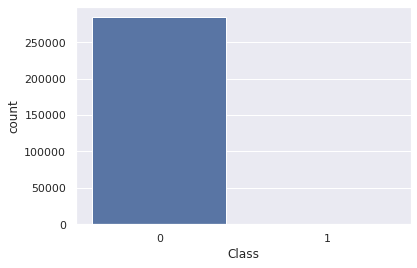

In [46]:
target = 'Class'
display(df_raw[target].value_counts())
sns.countplot(x=df_raw[target])

In [47]:
neg, pos = np.bincount(df_raw['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



## Feature Selection

In [48]:
cols_drop = ['Time']

df = df_raw.drop(cols_drop,axis=1)
df.shape

(284807, 30)

## Log transform

In [49]:
eps=0.001 # 0 => 0.1¢
df['Ammount'] = np.log(df.pop('Amount')+eps)

## Train-validation-test split with stratify

In [50]:
from sklearn.model_selection import train_test_split

target = 'Class'

df_Xtrain_orig,df_Xtest,ser_ytrain_orig,ser_ytest = train_test_split(df.drop([target],axis=1),
                                             df[target],
                                             test_size=0.2,
                                             stratify=df[target],
                                             random_state=SEED)

df_Xtrain,df_Xvalid,ser_ytrain,ser_yvalid = train_test_split(df_Xtrain_orig,
                                             ser_ytrain_orig,
                                             test_size=0.2,
                                             stratify=ser_ytrain_orig,
                                             random_state=SEED)


ytrain = np.array(ser_ytrain)
yvalid = np.array(ser_yvalid)
ytest = np.array(ser_ytest)


df.shape, df_Xtrain.shape, ser_ytrain.shape

((284807, 30), (182276, 29), (182276,))

## Normalize the data

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_Xtrain)

Xtrain = scaler.transform(df_Xtrain)
Xvalid = scaler.transform(df_Xvalid)
Xtest  = scaler.transform(df_Xtest)

# clip the values
Xtrain = np.clip(Xtrain, -5, 5)
Xvalid = np.clip(Xvalid, -5, 5)
Xtest = np.clip(Xtest, -5, 5)

# Oversampling minority class

In [52]:
ytrain = np.array(ser_ytrain)
bool_pos = ytrain != 0

Xtrain_pos = Xtrain[bool_pos]
Xtrain_neg = Xtrain[~bool_pos]

ytrain_pos = ytrain[bool_pos]
ytrain_neg = ytrain[~bool_pos]

In [53]:
ids = np.arange(len(Xtrain_pos))
choices = np.random.choice(ids, len(Xtrain_neg))

Xtrain_pos_over = Xtrain_pos[choices]
ytrain_pos_over = ytrain_pos[choices]

Xtrain_pos.shape, Xtrain_pos_over.shape

((315, 29), (181961, 29))

In [54]:
Xtrain_over = np.concatenate([Xtrain_pos_over, Xtrain_neg], axis=0)
ytrain_over = np.concatenate([ytrain_pos_over, ytrain_neg], axis=0)

order = np.arange(len(ytrain_over))
np.random.seed(SEED)
np.random.shuffle(order)

Xtrain_over = Xtrain_over[order]
ytrain_over = ytrain_over[order]

Xtrain.shape, Xtrain_over.shape

((182276, 29), (363922, 29))

# Modelling: Keras Sequential

## Params and Metrics

In [55]:
n_feats = Xtrain.shape[-1]


#============================================================
PARAMS_MODEL = {
    # layer 1
    'L1_units': 16,
    'L1_act': 'relu',
    'L1_dropout': 0.5,

    # optimizer
    'adam_lr': 1e-3,
}

#============================================================
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

#============================================================
PARAMS_FIT = {'epochs': 100,
          'batch_size': 2048,
          'patience': 10,
          'shuffle': True,
          }

neg, pos = np.bincount(df_raw['Class'])
PARAMS_FIT['steps_per_epoch'] = np.ceil(2.0 * neg / PARAMS_FIT['batch_size'])


#============================================================
# callbacks
cb_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=PARAMS_FIT['patience'],
    mode='max',
    restore_best_weights=True)

#cb_checkpt = keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")
cb_lr = lrcurve.KerasLearningCurve()
callbacks = [cb_early, cb_lr]

# Build the model

In [56]:
def make_model(metrics=METRICS,
               output_bias=None,
               n_feats=n_feats,
               params=PARAMS_MODEL):
    
    # use initial bias for imbalanced data
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    model = keras.Sequential([
        # layer 1
        keras.layers.Dense(params['L1_units'],
                           activation=params['L1_act'],
                           input_shape=(n_feats,)),

        keras.layers.Dropout(params['L1_dropout']),

        # last layer is dense 1 with activation sigmoid
        keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=params['adam_lr']),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

model = make_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [57]:
%%time
set_random_seed(SEED)
model = make_model(output_bias=None)

history = model.fit(
    Xtrain_over,
    ytrain_over,
    batch_size=PARAMS_FIT['batch_size'],
    epochs=PARAMS_FIT['epochs'],
    callbacks=callbacks,
    steps_per_epoch=PARAMS_FIT['steps_per_epoch'], # use steps_per_epoch for oversampling
    validation_data=(Xvalid, yvalid),
    verbose=10,
    # class_weight=class_weight # for oversample, do not use class weight
    )

Epoch 1/100


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
CPU times: user 43 s, sys: 2.59 s, total: 45.5 s
Wall time: 26.9 s


# Model Evaluation

## Confusion Matrix

In [58]:
from sklearn import metrics as skmetrics

In [59]:
yprobs = model.predict(Xtest)
yprobs[:5]

array([[0.47847813],
       [0.04455161],
       [0.02693081],
       [0.00672707],
       [0.1208196 ]], dtype=float32)

In [60]:
ypreds = (yprobs.flatten()>0.5).astype(np.int8)
ypreds[:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [61]:
skmetrics.confusion_matrix(ytest, ypreds)

array([[55898,   966],
       [   14,    84]])

In [62]:
from scikitplot import metrics as skpmetrics

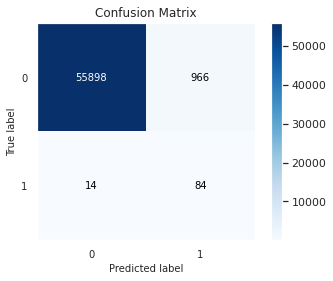

In [63]:
skpmetrics.plot_confusion_matrix(ytest,ypreds)

In [64]:
def plot_cm(labels, predictions, p=0.5):
  cm = sklearn.metrics.confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  55898
Legitimate Transactions Incorrectly Detected (False Positives):  966
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  98


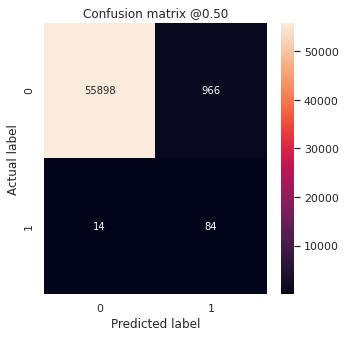

In [65]:
plot_cm(ytest,ypreds)

<div class="alert alert-block alert-success">
<b>NOTE:</b> 
confusion matrix is
TN FP
FN TP

Here, diagonal values are True Negatives and True Postives, ideally we want non-diagonal elements to be zero. But we some mis-predictions.

The top right value is False Positive.
They are not frauds but our model predict them as frauds.
Company needs to send them email to verify if the transaction
is legal or not and if we send too many emails it might annoy the customers.

The bottom left value is False Negative.
They are the actual frauds classified as normal persons by the model. This cost the company money and have to deal with fraudulent cases. This is much more undesirable than False Posivites.

In real life, the trade off much be chosen much carefully so as not to bug too many customers as well as not to miss the frauds.
</div>

## Accuracy Recall Scores

In [66]:
desc = "simple model"
yprobs = model.predict(Xtest)

ypreds = ypreds.ravel()
ypreds = (yprobs.flatten()>0.5).astype(np.int8)

df_eval = model_evaluation("keras", desc, ytest, ypreds,df_eval=None)

,Model,Description,Accuracy,Precision,Recall,F1,AUC
0,keras,simple model,0.982796,0.080000,0.857143,0.146341,0.920077


## Training History Plots

In [67]:
matplotlib.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [68]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                    color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

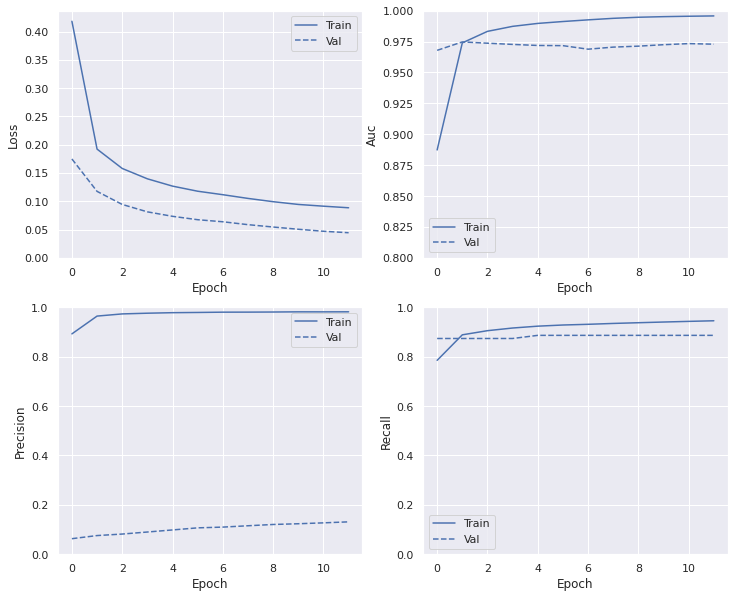

In [69]:
plot_metrics(history)

<div class="alert alert-block alert-danger">
<b>WARNING:</b> 
Here Validation data has more AUC than training, this is because dropout layer is not active when evaluating the model.
</div>

# Retrain for oversampled data
Because training is easier on the balanced data, the above training procedure may overfit quickly. 

So break up the epochs to give the `callbacks.EarlyStopping` finer control over when to stop training.

In [74]:
%%time
set_random_seed(SEED)
model = make_model(output_bias=None)

history = model.fit(
    Xtrain_over,
    ytrain_over,
    batch_size=PARAMS_FIT['batch_size'],
    epochs=10 * PARAMS_FIT['epochs'],
    callbacks=callbacks,
    steps_per_epoch=20, # use steps_per_epoch for oversampling
    validation_data=(Xvalid, yvalid),
    verbose=10
    )

Epoch 1/1000


Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Restoring model weights from the end of the best epoch.
Epoch 00045: early stopping
CPU times: user 24.4 s, sys: 1.52 s, total: 25.9 s
Wall time: 16.6 s


Legitimate Transactions Detected (True Negatives):  55994
Legitimate Transactions Incorrectly Detected (False Positives):  870
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  98


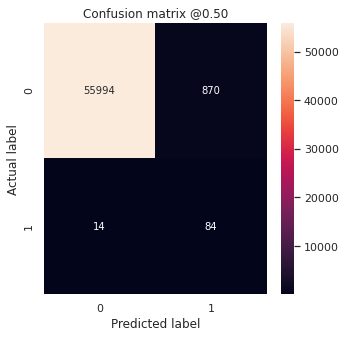

In [75]:
yprobs = model.predict(Xtest)
ypreds = (yprobs.flatten()>0.5).astype(np.int8)

plot_cm(ytest,ypreds)

# Time Taken

In [76]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 5 min 16 secs
